## Challenge: Logistic Regression
Engineer your features, then create three models. Each model will be run on a training set and a test-set (or multiple test-sets, if you take a folds approach). The models should be:

Vanilla logistic regression
Ridge logistic regression
Lasso logistic regression
If you're stuck on how to begin combining your two new modeling skills, here's a hint: the SKlearn LogisticRegression method has a "penalty" argument that takes either 'l1' or 'l2' as a value.

In your report, evaluate all three models and decide on your best. Be clear about the decisions you made that led to these models (feature selection, regularization parameter selection, model evaluation criteria) and why you think that particular model is the best of the three. Also reflect on the strengths and limitations of regression as a modeling approach. Were there things you couldn't do but you wish you could have done?

In [1]:
import warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)
#simplefilter(action='ignore', category=UndefinedMetricWarning)
import pandas as pd
pd.set_option('float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', 999)
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
warnings.filterwarnings("ignore", category=mpl.cbook.MatplotlibDeprecationWarning)
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [2]:
df = pd.read_csv(
    "../Datasets/processed.cleveland.data",
    header=None,
    na_values='?'
)
df = df.dropna()# only 6 rows
df.columns = [
'age' ,    
'sex'     ,
'cp'   ,
'trestbps',
'chol'    ,
'fbs'    ,
'restecg' ,
'thalach',
'exang'  ,
'oldpeak',
'slope'  ,
'ca'    ,
'thal'  ,
'num' 
]

df.num = [0 if x == 0 else 1 for x in df['num']]
df['trestbps_squared'] = df.trestbps**2
df['chol_squared'] = df.chol**2
#df['restecg_squared'] = df.restecg**2
df['thalach_squared'] = df.thalach**2
df['fbs_squared'] = df.fbs**2
df['exang_squared'] = df.exang**2
df['ca_squared'] = df.ca**2
df['thal_squared'] = df.thal**2
pp.ProfileReport(df, check_correlation=True)

Number of variables,22
Number of observations,297
Total Missing (%),0.0%
Total size in memory,51.1 KiB
Average record size in memory,176.3 B
Numeric,11
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,7


## Correlation

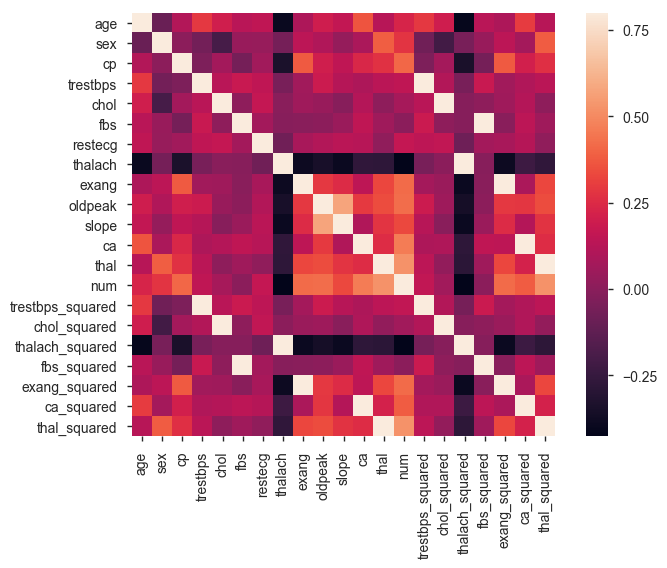

Top Absolute Correlations
exang            exang_squared      1.00
fbs              fbs_squared        1.00
thal             thal_squared       1.00
trestbps         trestbps_squared   1.00
thalach          thalach_squared    0.99
chol             chol_squared       0.98
ca               ca_squared         0.94
oldpeak          slope              0.58
thal             num                0.53
num              thal_squared       0.53
ca               num                0.46
num              thalach_squared    0.43
oldpeak          num                0.42
thalach          num                0.42
exang            num                0.42
num              exang_squared      0.42
age              thalach_squared    0.41
cp               num                0.41
age              thalach            0.39
slope            thalach_squared    0.39
thalach_squared  exang_squared      0.39
exang            thalach_squared    0.39
thalach          slope              0.39
                 exang         

In [3]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

sns.heatmap(df.corr(), vmax=.8, square=True)
plt.show()
print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 30).to_string())

In [4]:
X = df.drop(columns=['num'])
y = df.num

### Vanilla Logistic Regression

In [5]:
lr = LogisticRegression(C=1e9)

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by num')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

score = cross_val_score(fit, X, y, cv=10)
print("\nCross Validated Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Coefficients
[[-3.48133378e-03  3.71319134e-01  6.35328183e-01 -2.62106909e-02
   2.33952019e-02 -1.65537949e-01  3.43802510e-01 -9.06272409e-02
   3.68285602e-01  4.80473786e-01  2.42487193e-01  5.39186181e-01
  -2.01589656e-02  1.49880242e-04 -3.70618961e-05  2.52233374e-04
  -1.65537949e-01  3.68285602e-01  1.15920104e-01  4.53578528e-02]]
[-0.00328353]

 Accuracy by admission status
num      0    1
row_0          
0      143   26
1       17  111

 Percentage accuracy
0.8552188552188552

Cross Validated Accuracy: 0.84 (+/- 0.12)


### Ridge Regression (L2-Regularization)

In [6]:
lr = LogisticRegression(penalty='l2')

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by num')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

score = cross_val_score(fit, X, y, cv=10)
print("\nCross Validated Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Coefficients
[[-9.71932578e-03  1.73026065e-01  4.55175521e-01 -2.09723089e-02
   2.00254165e-02 -7.85541501e-02  2.52247722e-01 -6.26408100e-02
   2.24777478e-01  3.76068815e-01  1.63794928e-01  3.08897991e-01
  -4.43149248e-03  1.25424633e-04 -3.15404009e-05  1.37540745e-04
  -7.85541501e-02  2.24777478e-01  2.34600968e-01  4.64002273e-02]]
[-0.0013462]

 Accuracy by admission status
num      0    1
row_0          
0      143   27
1       17  110

 Percentage accuracy
0.8518518518518519

Cross Validated Accuracy: 0.84 (+/- 0.11)


### Lasso Regression  (L1-Regularization)

In [7]:
lr = LogisticRegression(penalty='l1')

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by num')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

score = cross_val_score(fit, X, y, cv=10)
print("\nCross Validated Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Coefficients
[[-1.81885234e-02  9.00279805e-01  5.52956037e-01 -3.27774618e-02
   1.97304283e-02 -3.70216695e-01  2.41591096e-01 -7.18419638e-02
   5.84384086e-02  3.26842310e-01  3.86405416e-01  2.04046976e+00
   0.00000000e+00  1.92901442e-04 -2.75994528e-05  1.70058931e-04
  -1.66895668e-01  6.01482027e-01 -4.17136348e-01  3.89969136e-02]]
[0.]

 Accuracy by admission status
num      0    1
row_0          
0      143   25
1       17  112

 Percentage accuracy
0.8585858585858586


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



Cross Validated Accuracy: 0.83 (+/- 0.15)


#### Experiment Analysis:
The best model is the second one, Ridge Regression (L2-Regularization).
Even it is it minor lead, the cross validation accuracy has a better standard deviation. Because we have highly correlated features L2-Regularization leads to a better accuracy. 
Cross validation is used as a main metric to incorporate a train / test split for this experiment.
L1-Regularization is not fitting in here because there is no large feature space to select from.
L2-Regularization has also its limits because only the "squared" are highly correlated and they are not contributing much for the prediction of "num". 